In [8]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import  PCA
import matplotlib.pyplot as plt

In [2]:
# Load astronomy data
data = pd.read_csv('../Data/DR3/espectros_normalizadosRG.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,id
0,0.567933,0.468963,0.418387,0.397268,0.366222,0.314062,0.305755,0.396973,0.528640,0.530481,...,0.553042,0.550603,0.541435,0.543974,0.556192,0.566876,0.602345,0.627477,0.676326,3
1,0.357207,0.312090,0.266491,0.252556,0.274381,0.292628,0.282017,0.257519,0.260231,0.286517,...,0.593430,0.588292,0.572961,0.566345,0.565697,0.559901,0.575898,0.581218,0.610140,3
2,0.312563,0.307927,0.255154,0.212121,0.208340,0.222300,0.231618,0.234574,0.245502,0.252881,...,0.621034,0.616308,0.600225,0.592773,0.591315,0.584525,0.600805,0.606444,0.637230,3
3,0.296776,0.307322,0.277153,0.242500,0.254109,0.283406,0.277839,0.244421,0.252737,0.305865,...,0.607069,0.608714,0.599235,0.597644,0.600575,0.595629,0.610977,0.611923,0.634690,3
4,0.244860,0.183807,0.154699,0.148348,0.149485,0.151795,0.160408,0.173335,0.185585,0.187322,...,0.720240,0.723352,0.713522,0.713116,0.717857,0.712581,0.730649,0.730299,0.754630,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12116,0.110724,0.117143,0.108315,0.094340,0.095868,0.113917,0.128631,0.120617,0.103777,0.103601,...,0.904124,0.903131,0.884643,0.877637,0.877998,0.868636,0.891624,0.897031,0.938228,3
12117,0.123169,0.056995,0.075046,0.085722,0.073361,0.089574,0.134921,0.136902,0.083655,0.069436,...,0.914451,0.924044,0.919261,0.927998,0.943784,0.945054,0.974174,0.973854,1.000000,3
12118,0.149852,0.098694,0.087556,0.092886,0.097180,0.102063,0.106407,0.091439,0.060448,0.054961,...,0.949209,0.963151,0.959169,0.965922,0.976643,0.969675,0.989756,0.980251,1.000000,3
12119,0.232100,0.166834,0.098958,0.090816,0.123015,0.141063,0.122684,0.100418,0.125119,0.179554,...,0.909980,0.926298,0.928572,0.943763,0.964274,0.966858,0.993788,0.985947,1.000000,3


In [3]:
# Preprocess the data by standardizing it
data_standardized = (data - data.mean()) / data.std()

In [4]:
data_standardized.drop(columns='id', inplace=True)

C:\Users\joshp\AppData\Local\Temp\ipykernel_13116\1474828626.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


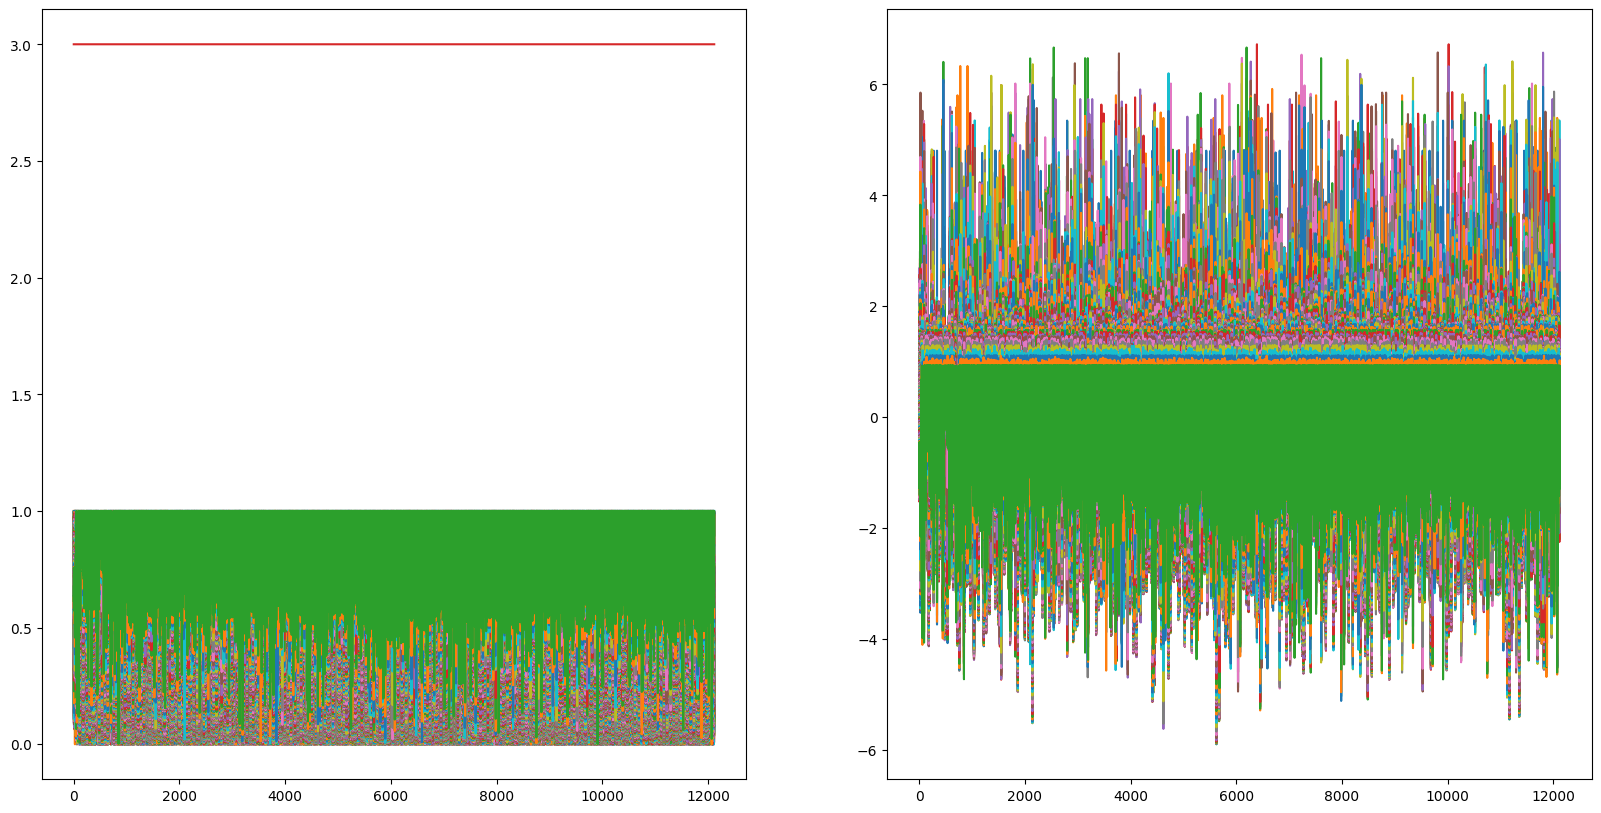

In [7]:
fig = plt.figure(figsize=(20,10))
ax =fig.subplots(1,2)
ax[0].plot(data)
ax[1].plot(data_standardized)
fig.show()

In [9]:
#iteration to visualize the optimal number of components in PCA
for i in range(1,50):
  data = []
  pca = PCA(n_components=i)
  features_reduced = pca.fit_transform(data_standardized)
  print(f"n = {i}")
  print(pca.explained_variance_ratio_.sum())
  data.append(pca.explained_variance_ratio_.sum())

n = 1
0.5939583145943712
n = 2
0.9523626922709801
n = 3
0.9693425257007339
n = 4
0.9729677602702707
n = 5
0.9762429689177423
n = 6
0.9780801018218551
n = 7
0.9797491533813553
n = 8
0.9813640611489312
n = 9
0.9828103895167329
n = 10
0.9840421894035694
n = 11
0.9851576720277048
n = 12
0.9861875476008954
n = 13
0.9871759638945252
n = 14
0.9880155808020121
n = 15
0.9887743772202637
n = 16
0.9895239480436224
n = 17
0.9902061397362357
n = 18
0.9908261416696327
n = 19
0.9914072632270924
n = 20
0.9919543849325457
n = 21
0.9924591851588872
n = 22
0.9928923109440211
n = 23
0.9932909000530368
n = 24
0.9936740106529344
n = 25
0.994044292419414
n = 26
0.9943796236090195
n = 27
0.9946997965847241
n = 28
0.9949861195272367
n = 29
0.9952367341520916
n = 30
0.9954699357659297
n = 31
0.9956875041387513
n = 32
0.9958742078083646
n = 33
0.9960416648795957
n = 34
0.9962004708569796
n = 35
0.996344454169804
n = 36
0.9964812478709804
n = 37
0.9966047140564559
n = 38
0.9967282609194115
n = 39
0.99684373232769

In [11]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=17)
pca_transformed = pca_data.fit_transform(data_standardized)
pca_transformed_data = pd.DataFrame(pca_transformed)

In [12]:
pca_transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-14.180386,13.887000,3.313965,0.269000,-0.256779,-0.313051,0.838483,-0.870420,0.335087,0.314145,1.216976,-0.445653,0.307812,-1.114674,-0.841998,-1.030384,0.054553
1,-11.910869,8.361456,-1.870524,-0.568669,0.422947,-0.174984,-0.067351,-0.242113,0.280177,-0.162062,-0.239791,-0.378345,0.110764,0.294360,0.238565,0.182931,0.106555
2,-11.061814,6.453929,-3.441692,-0.488540,0.518754,0.078095,-0.047905,0.336117,0.180441,0.086051,-0.150610,-0.317067,0.036631,-0.093765,-0.110671,-0.114576,0.039909
3,-11.745113,8.306910,-2.178775,-0.496574,0.023693,0.130607,-0.124521,-0.212470,0.070009,-0.172493,-0.311733,-0.270478,-0.225858,-0.057289,0.244641,-0.071854,0.029869
4,-8.557609,-2.836807,-3.077143,0.316495,0.360862,0.183711,-0.147214,0.204312,-0.132982,-0.169385,0.035330,-0.037062,0.265485,-0.005020,-0.307421,-0.010859,0.030840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12116,-5.411266,-13.872091,-0.653969,-0.351587,0.225570,0.646012,-0.174350,0.074512,-0.303494,0.158726,-0.226612,0.322090,0.241957,-0.218320,-0.116361,0.336789,-0.237485
12117,4.761060,-11.051558,1.304196,-0.061973,-0.191202,-0.214573,-0.990321,0.445586,0.195394,-0.105307,-0.106299,0.091332,0.223067,0.090721,0.203141,0.017211,0.339259
12118,3.118666,-13.491080,1.062903,0.000034,-0.428884,0.225330,-0.039020,0.371438,0.071918,-0.004210,-0.269602,0.182192,0.036643,0.195740,-0.270537,0.442685,0.201828
12119,0.237662,-12.455362,1.944003,-0.225776,-0.854373,-0.159176,-0.136136,-0.375310,0.929879,-0.321504,0.311649,-0.094364,-0.083854,-0.045768,0.591006,-0.414190,0.170241


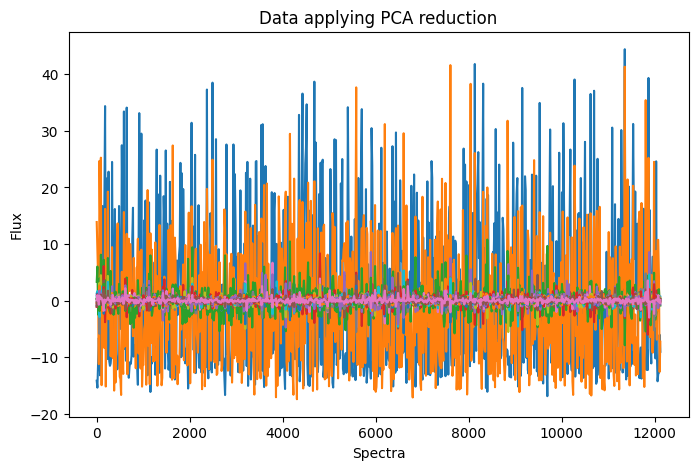

In [15]:
plt.figure(figsize=(8,5))
plt.title("Data applying PCA reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(pca_transformed_data.iloc[::15])
plt.show()

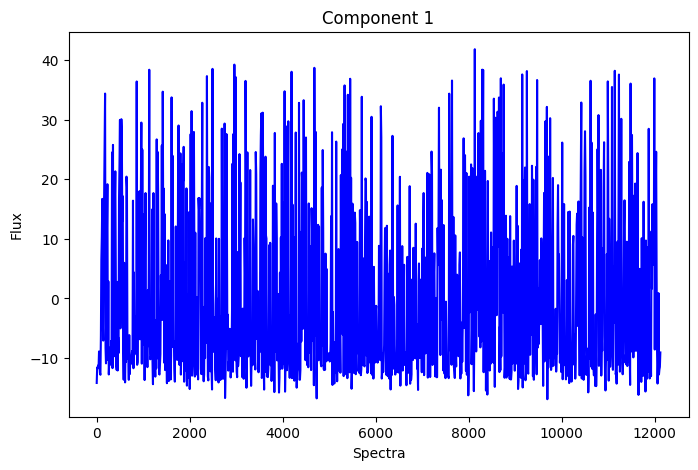

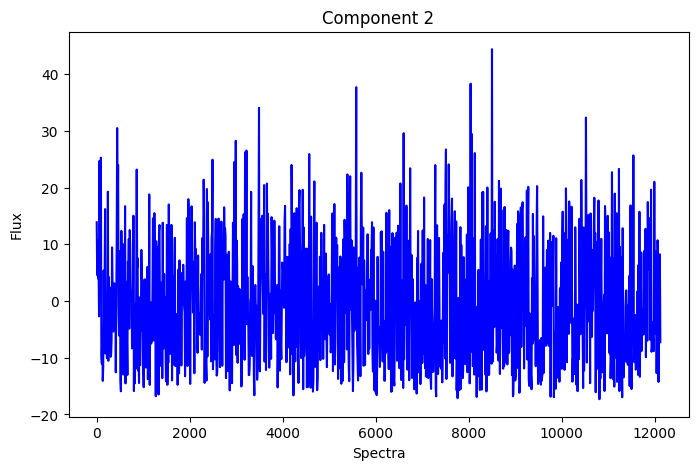

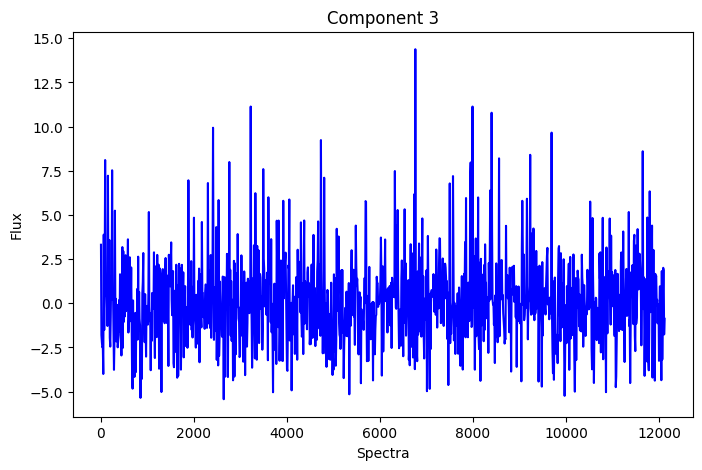

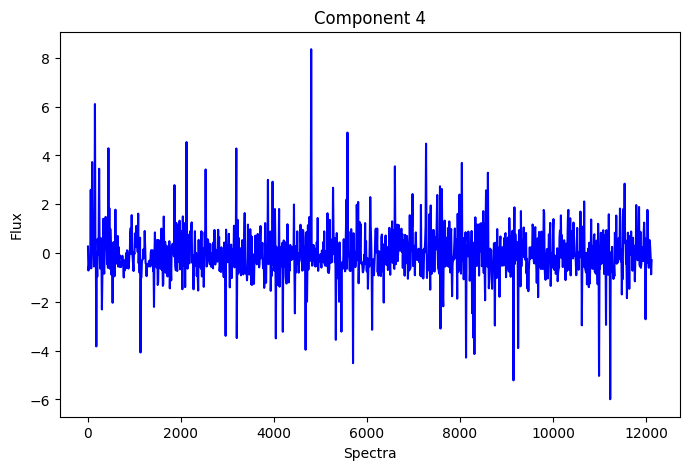

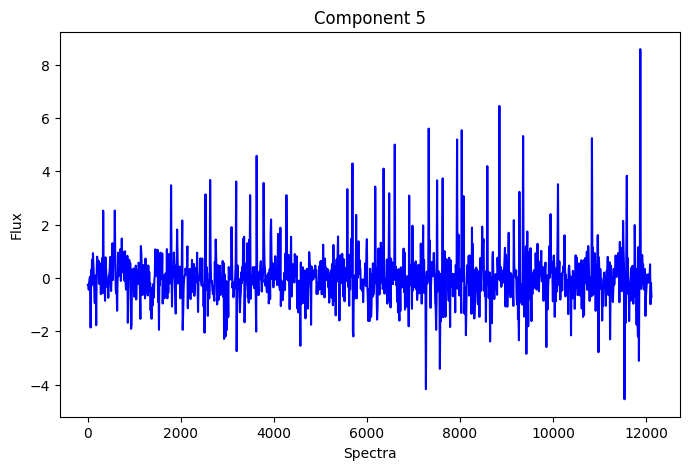

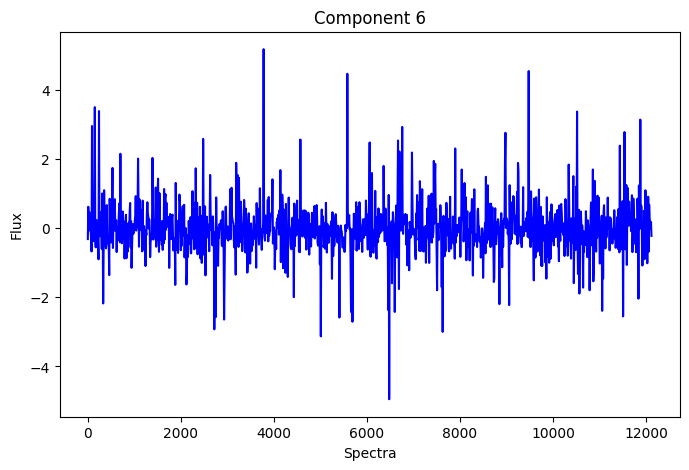

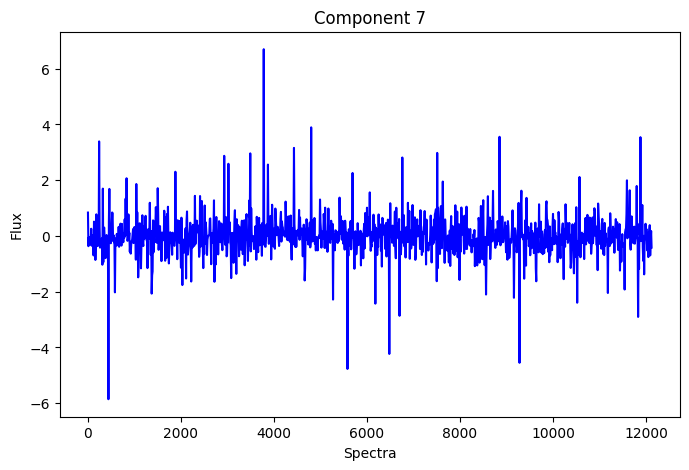

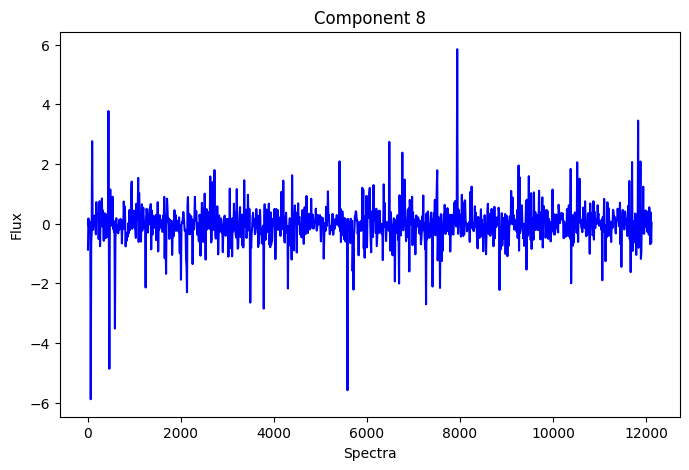

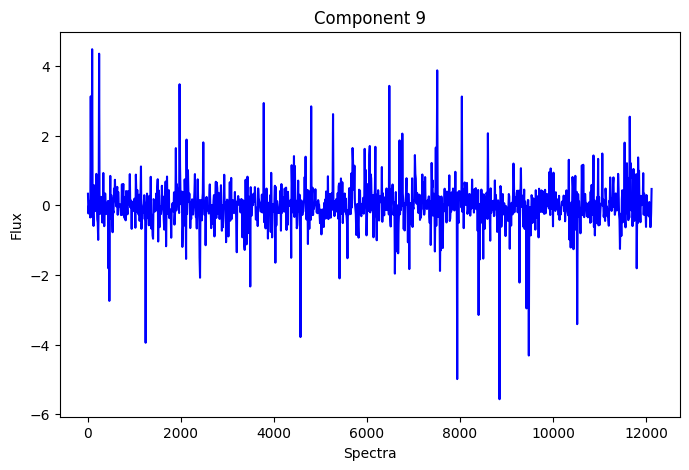

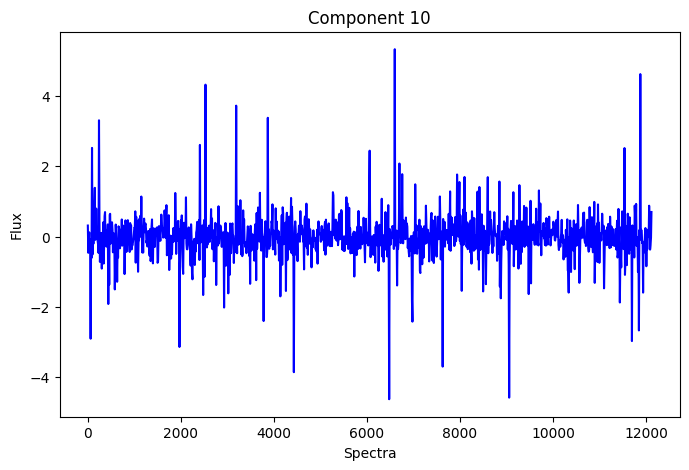

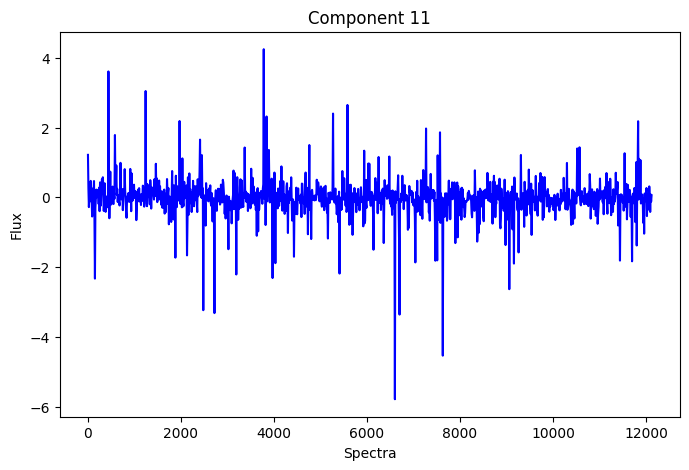

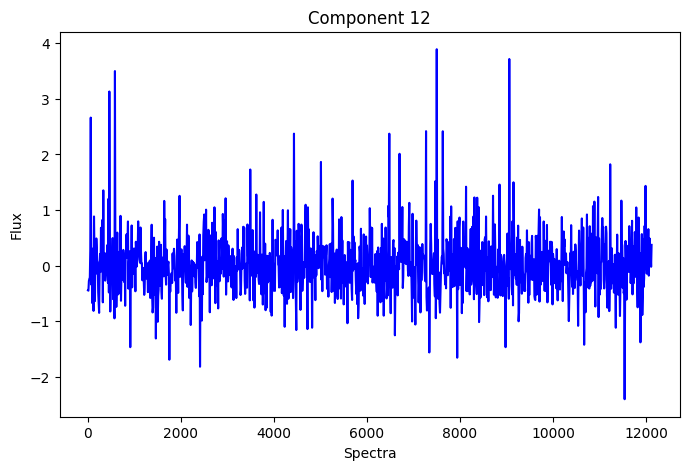

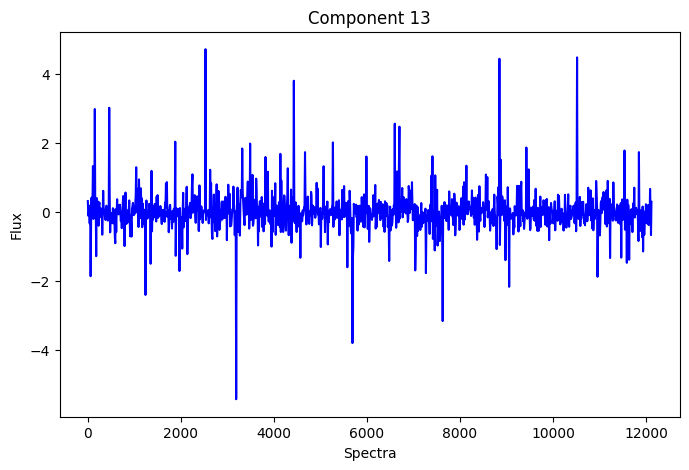

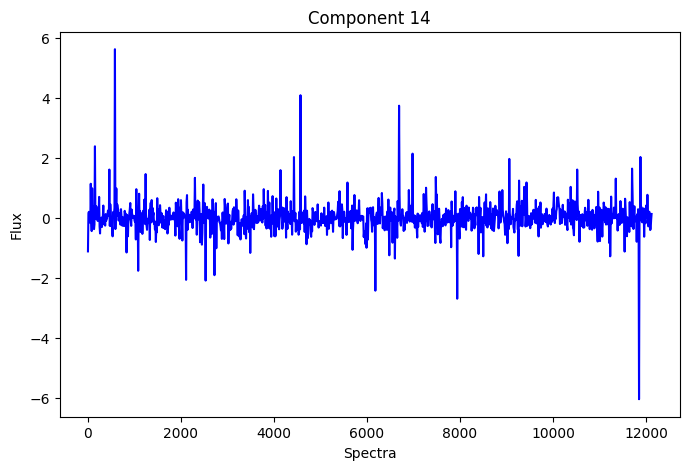

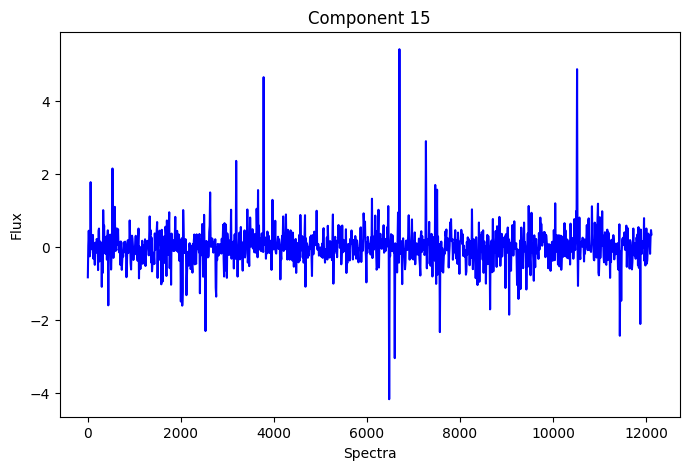

In [18]:
for i in range(0,15):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i+1}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(pca_transformed_data.iloc[::10,i], '-',markersize=1, color = "b")
    plt.show()

In [19]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=17, n_neighbors=70)
lle_transformed = lle.fit_transform(data_standardized)
lle_transformed_data = pd.DataFrame(lle_transformed)

In [20]:
lle_transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.002037,-0.014745,-0.011615,0.001712,0.000102,0.000794,0.002466,-0.001635,0.002333,0.007877,0.000200,0.011186,-0.035793,0.015111,0.005910,0.008676,0.002386
1,0.001033,-0.009256,0.009344,0.006108,-0.007170,-0.000586,0.001521,0.001758,0.001189,-0.003716,0.000259,0.001973,0.003057,-0.002903,0.000969,-0.002523,-0.005013
2,0.002061,-0.007421,0.015840,0.006235,-0.004439,-0.000186,-0.002599,0.005180,-0.000113,-0.022197,0.006113,0.005947,-0.003972,-0.001101,0.010646,-0.003583,-0.007283
3,0.001095,-0.009004,0.010647,0.006367,-0.007941,-0.000814,0.000500,0.003833,-0.000800,-0.009102,0.000992,0.006057,-0.006672,-0.002497,0.007675,-0.015104,0.005158
4,0.006369,-0.001043,0.013427,-0.005337,0.016977,0.006109,-0.002758,-0.010812,-0.001051,-0.002955,-0.000253,-0.000171,-0.002683,0.003670,-0.008966,-0.002856,-0.019731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12116,0.010531,0.006348,-0.001917,-0.011148,-0.002467,0.007091,0.010163,-0.004076,-0.000321,-0.003184,-0.004777,0.013500,0.000747,-0.009474,-0.007682,0.000342,0.002848
12117,0.003852,0.008391,-0.005380,0.005136,-0.005289,0.001678,-0.012857,-0.005829,0.009234,-0.004076,-0.006100,-0.008654,-0.000625,0.010806,-0.005170,-0.005935,-0.001783
12118,0.006041,0.008932,-0.006188,0.001216,-0.008133,0.005308,-0.004333,0.002596,0.007546,-0.005141,-0.004422,-0.006050,0.000524,0.008845,-0.001546,0.003122,-0.001283
12119,0.006914,0.006922,-0.007155,-0.001112,-0.009647,-0.003860,-0.005987,-0.001395,0.007082,-0.006357,0.000172,-0.006767,0.000264,0.009484,-0.002598,0.002706,-0.003029


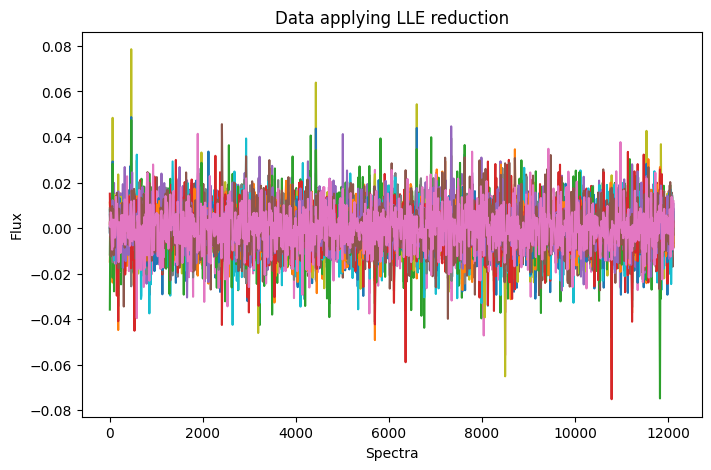

In [21]:
plt.figure(figsize=(8,5))
plt.title("Data applying LLE reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(lle_transformed_data.iloc[::10, ::])
plt.show()

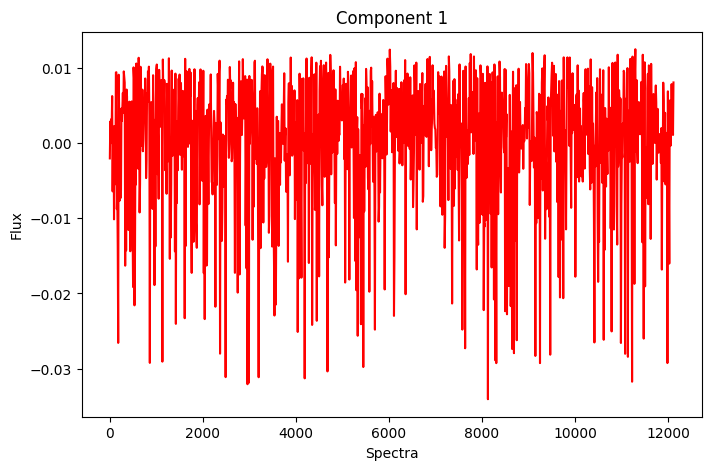

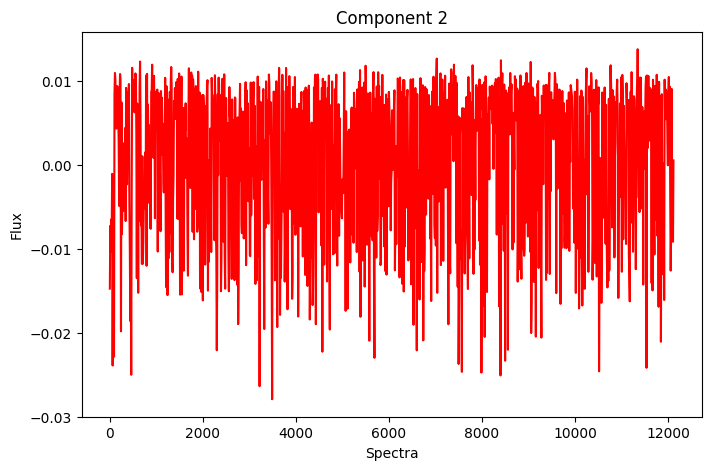

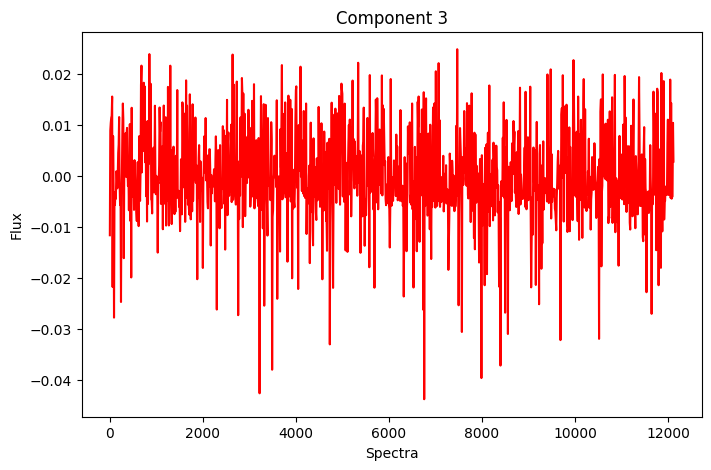

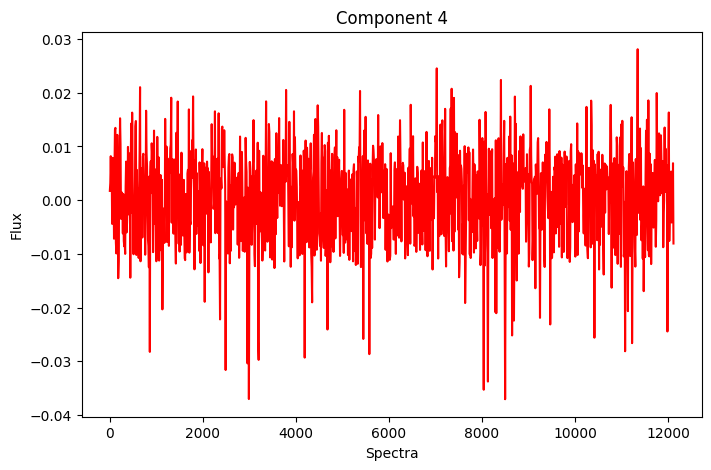

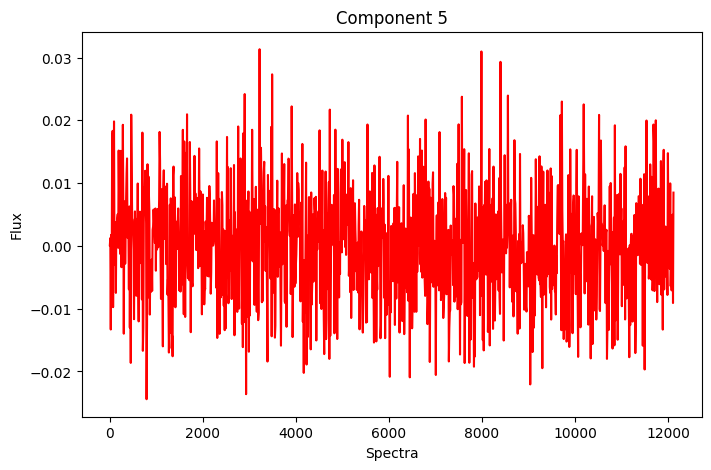

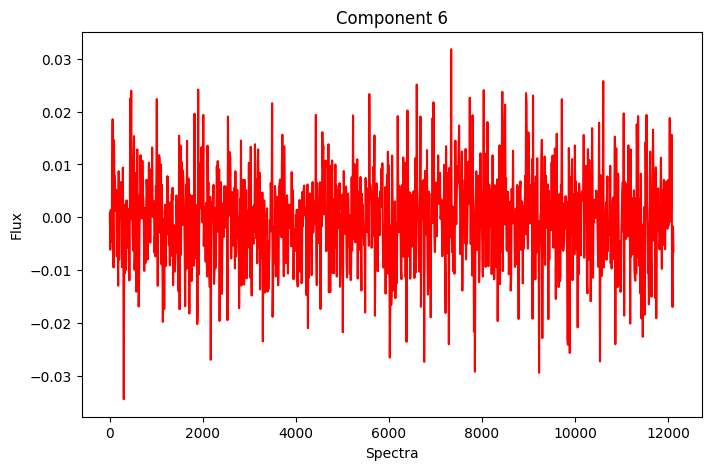

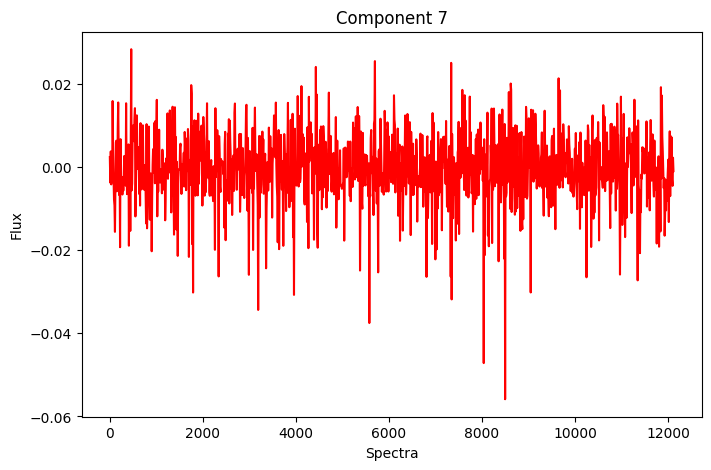

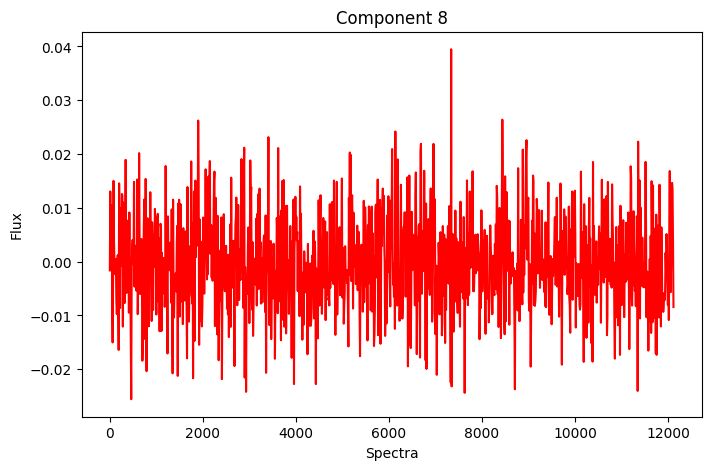

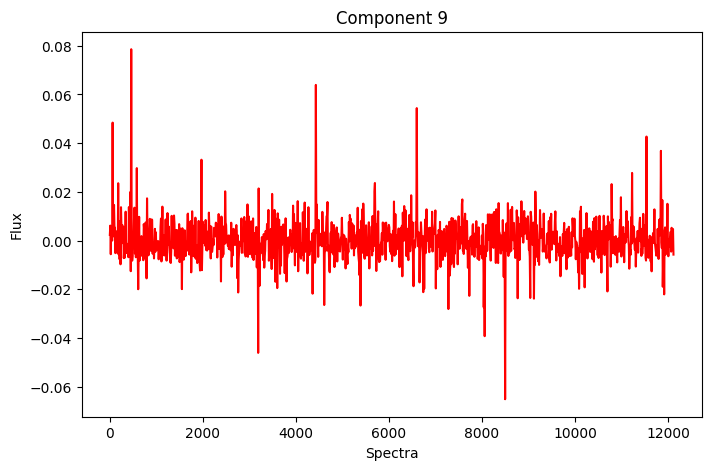

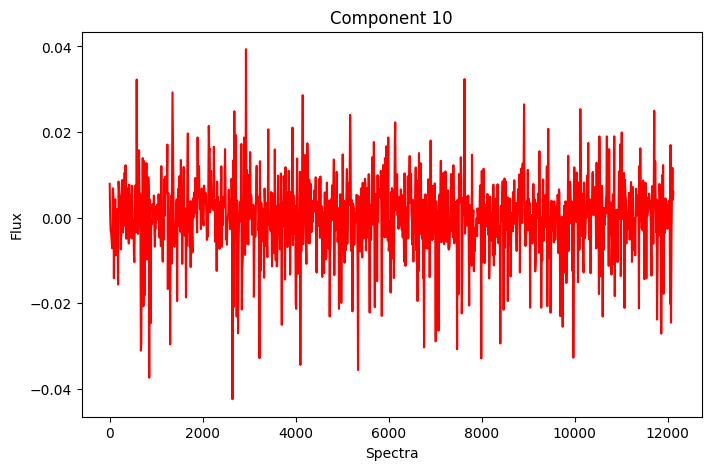

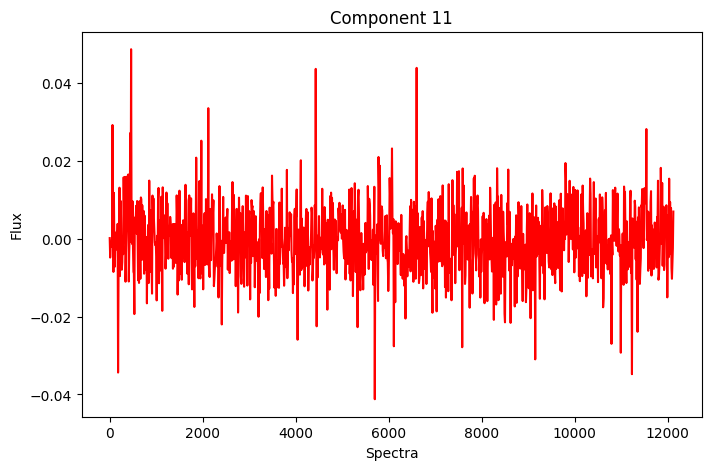

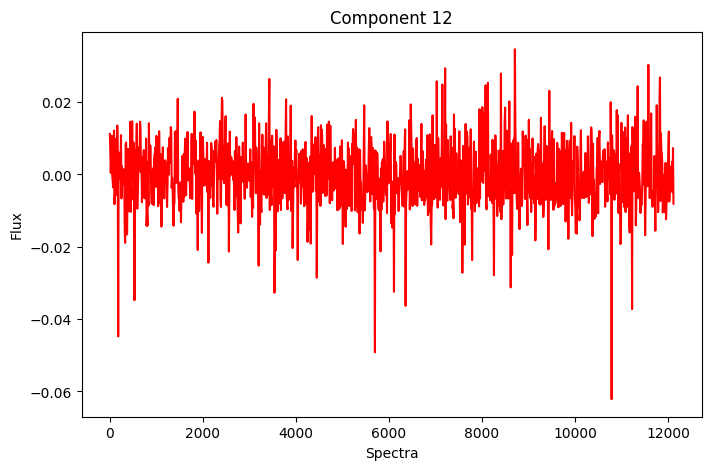

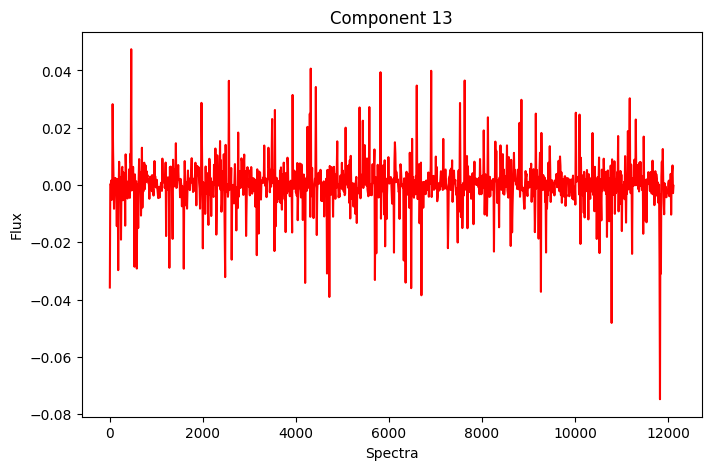

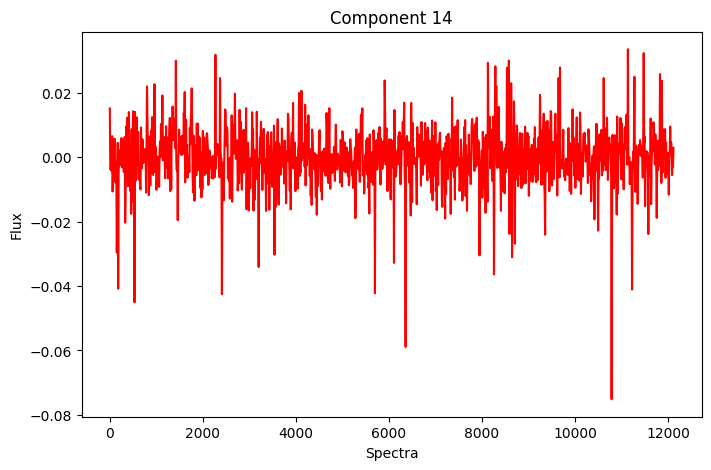

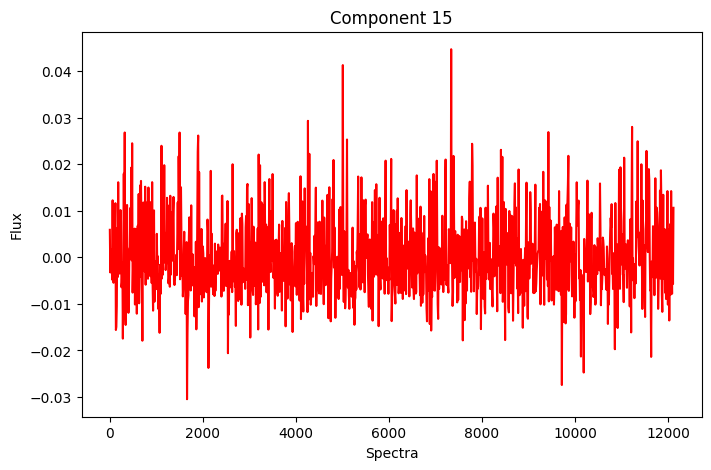

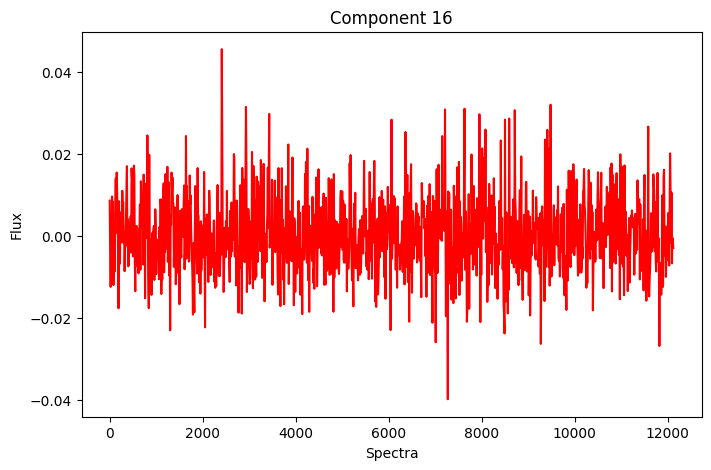

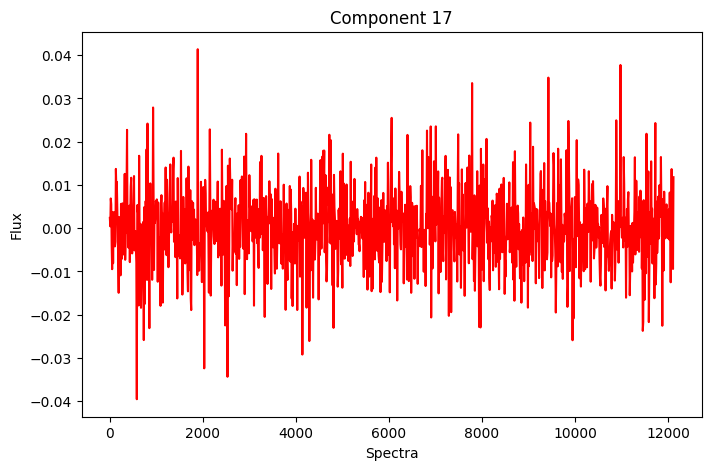

In [22]:
for i in range(0,17):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i+1}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(lle_transformed_data.iloc[::10, i], '-',markersize=1, color = "r")
    plt.show()

In [28]:
# Perform HLLE on the data
#for method hessian, n_neighbours must be a greater than [n_components * (n_components +3) /2 ]
hlle = LocallyLinearEmbedding(n_components=12, n_neighbors=100, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data_standardized)
hlle_transformed_data = pd.DataFrame(hlle_transformed)

In [29]:
hlle_transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006
1,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006
2,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006
3,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006
4,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006
...,...,...,...,...,...,...,...,...,...,...,...,...
12116,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006
12117,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006
12118,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006
12119,1.438571e-07,0.000001,0.000005,0.000013,-0.000012,0.000012,-0.000019,-0.000028,-0.000047,0.000021,0.00004,-0.00006


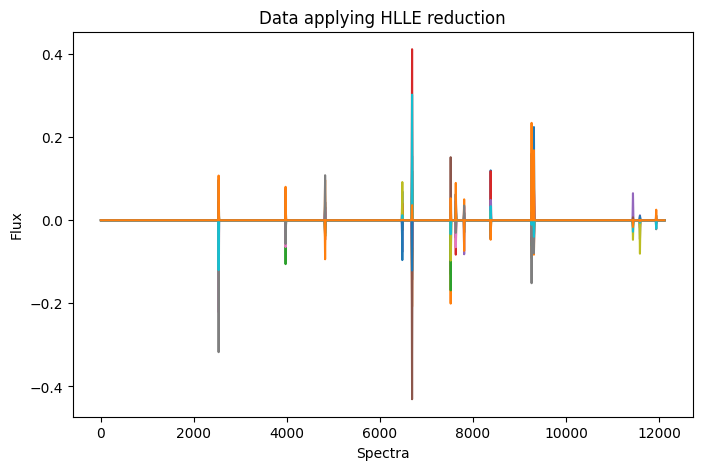

In [32]:
plt.figure(figsize=(8,5))
plt.title("Data applying HLLE reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(hlle_transformed_data.iloc[0::10, ::])
plt.show()

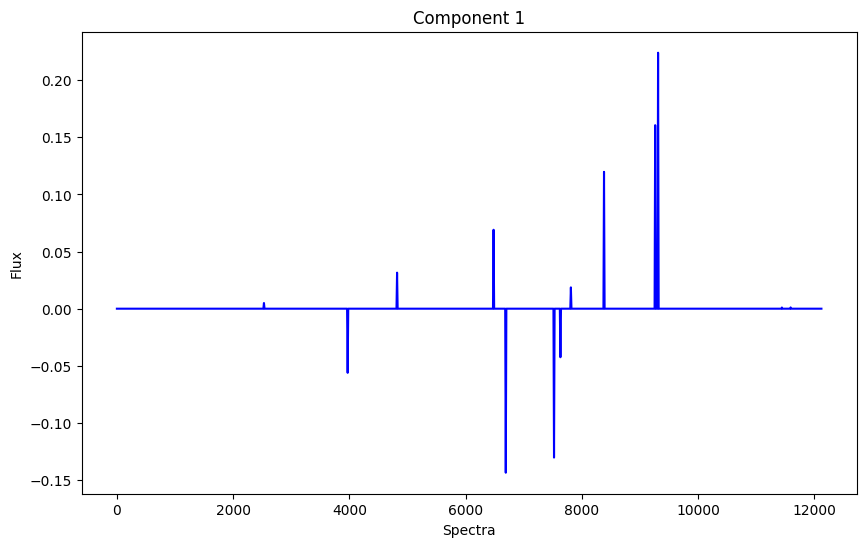

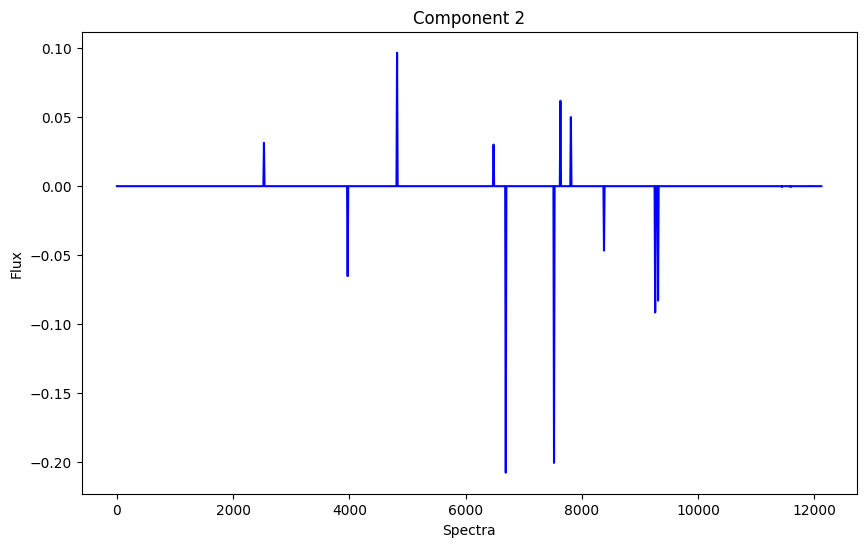

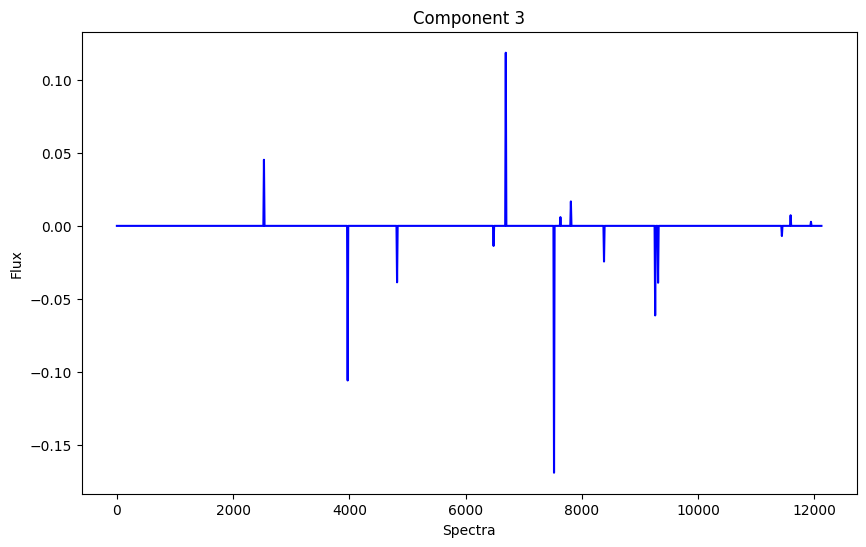

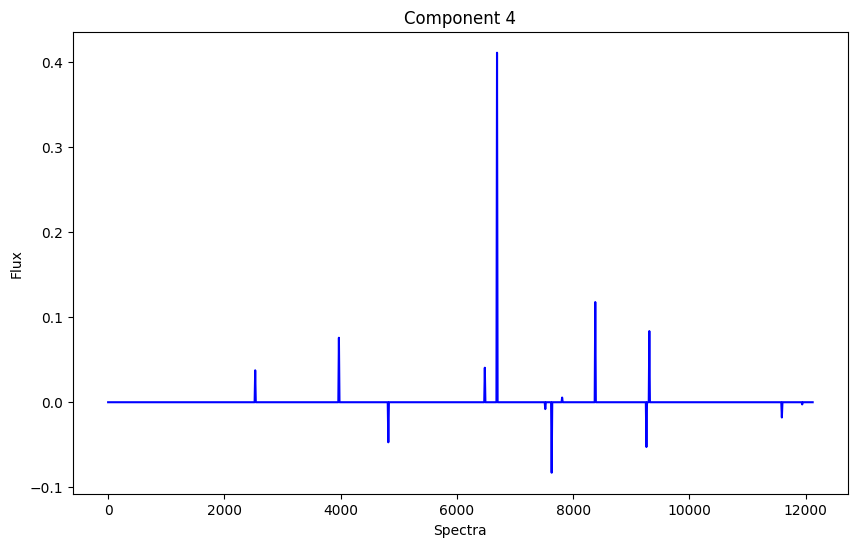

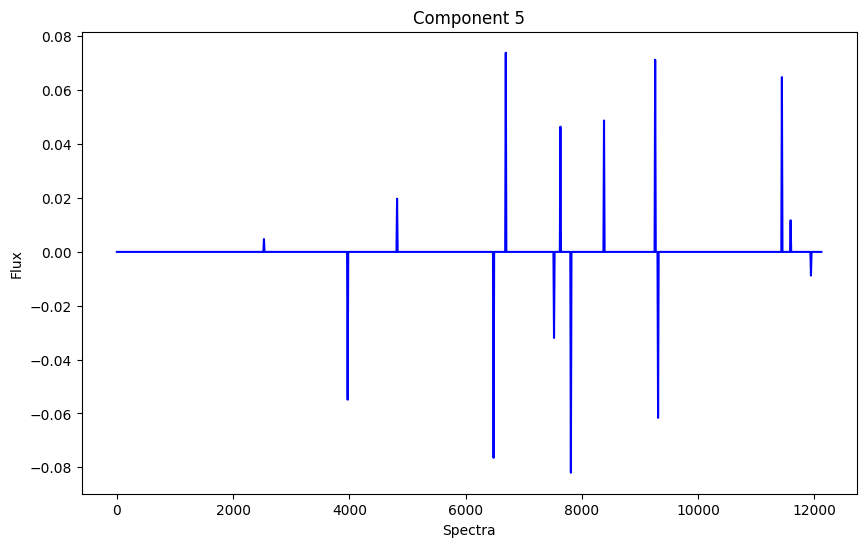

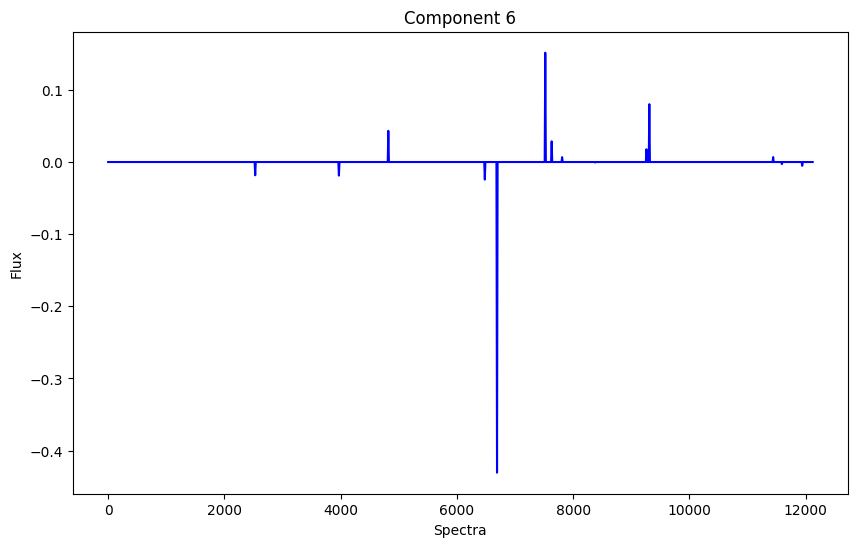

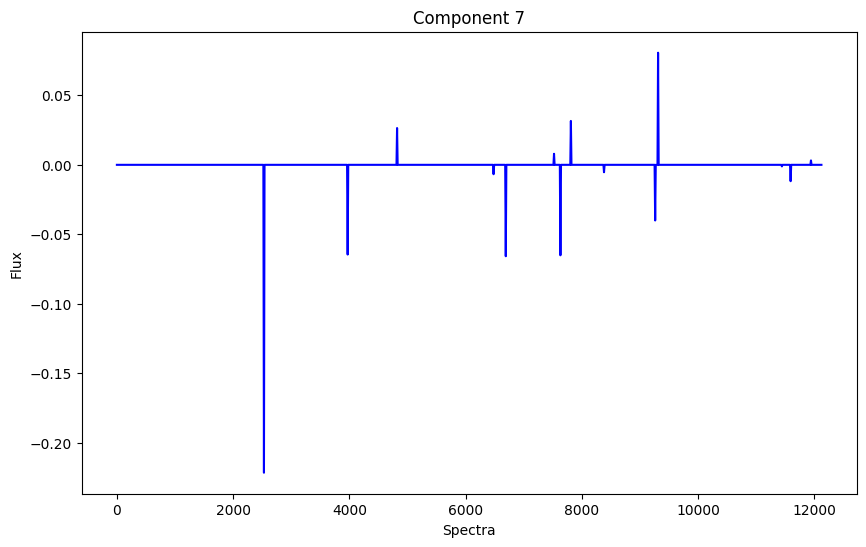

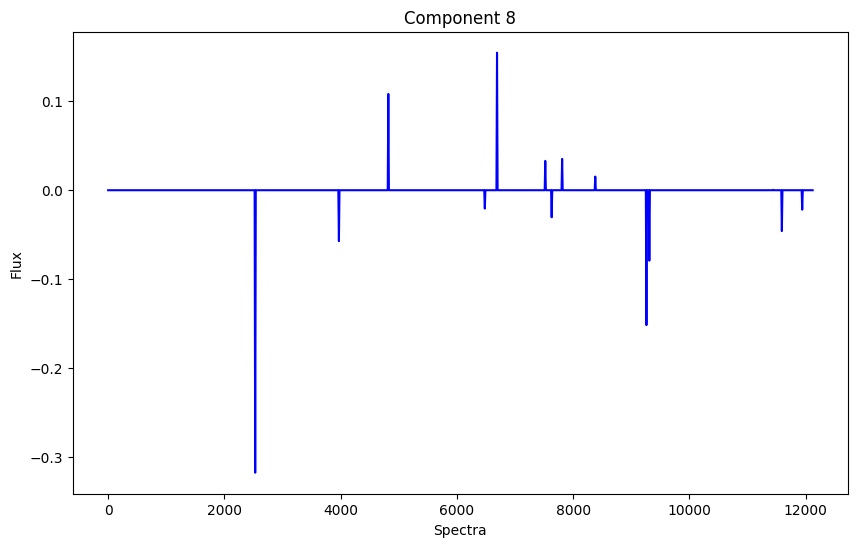

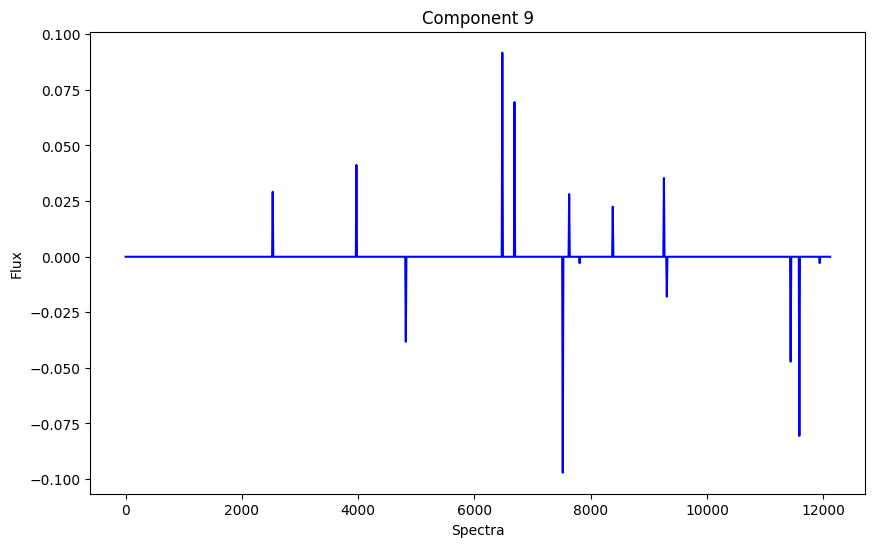

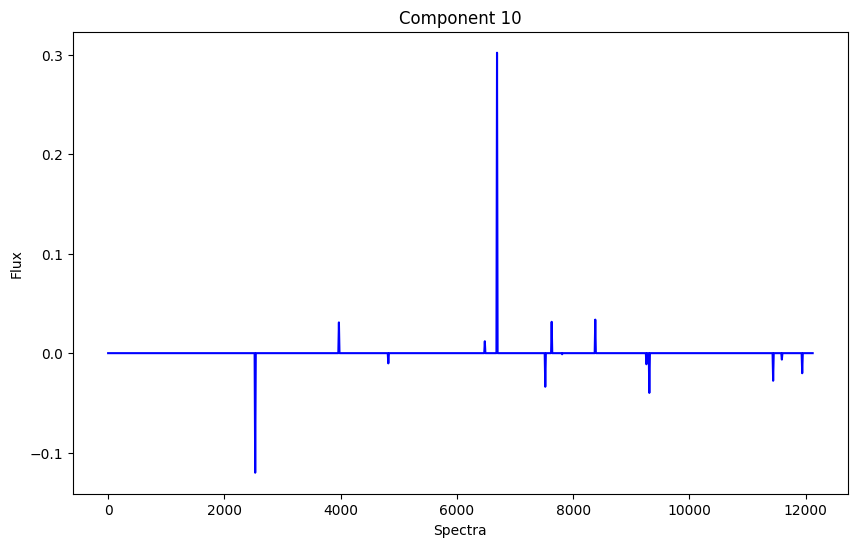

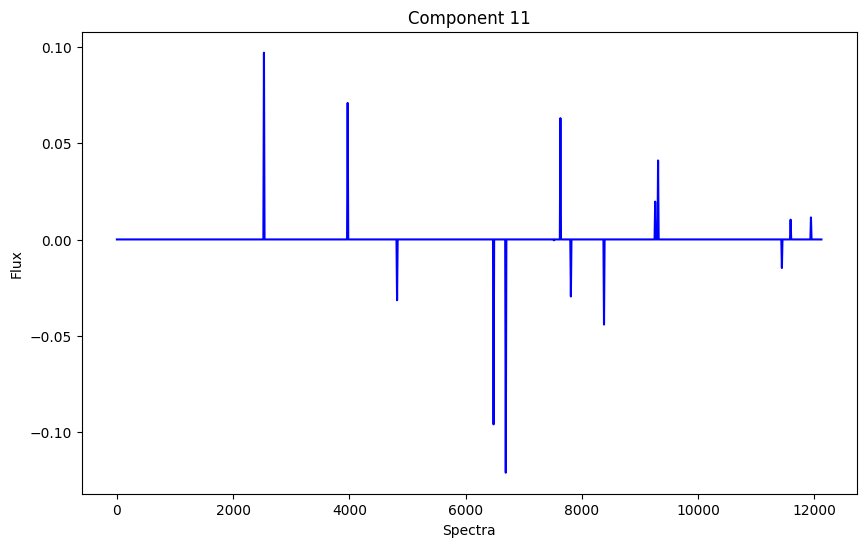

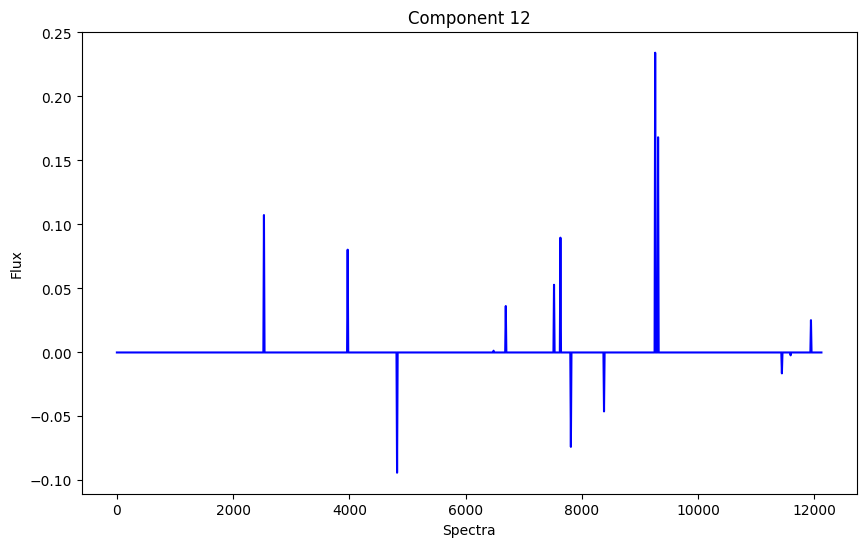

In [33]:
for i in range(0,12):
    plt.figure(figsize=(10,6))
    plt.title(f"Component {i+1}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(hlle_transformed_data.iloc[0::10, i], '-',markersize=1, color = "b")
    plt.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_13116\2143808558.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


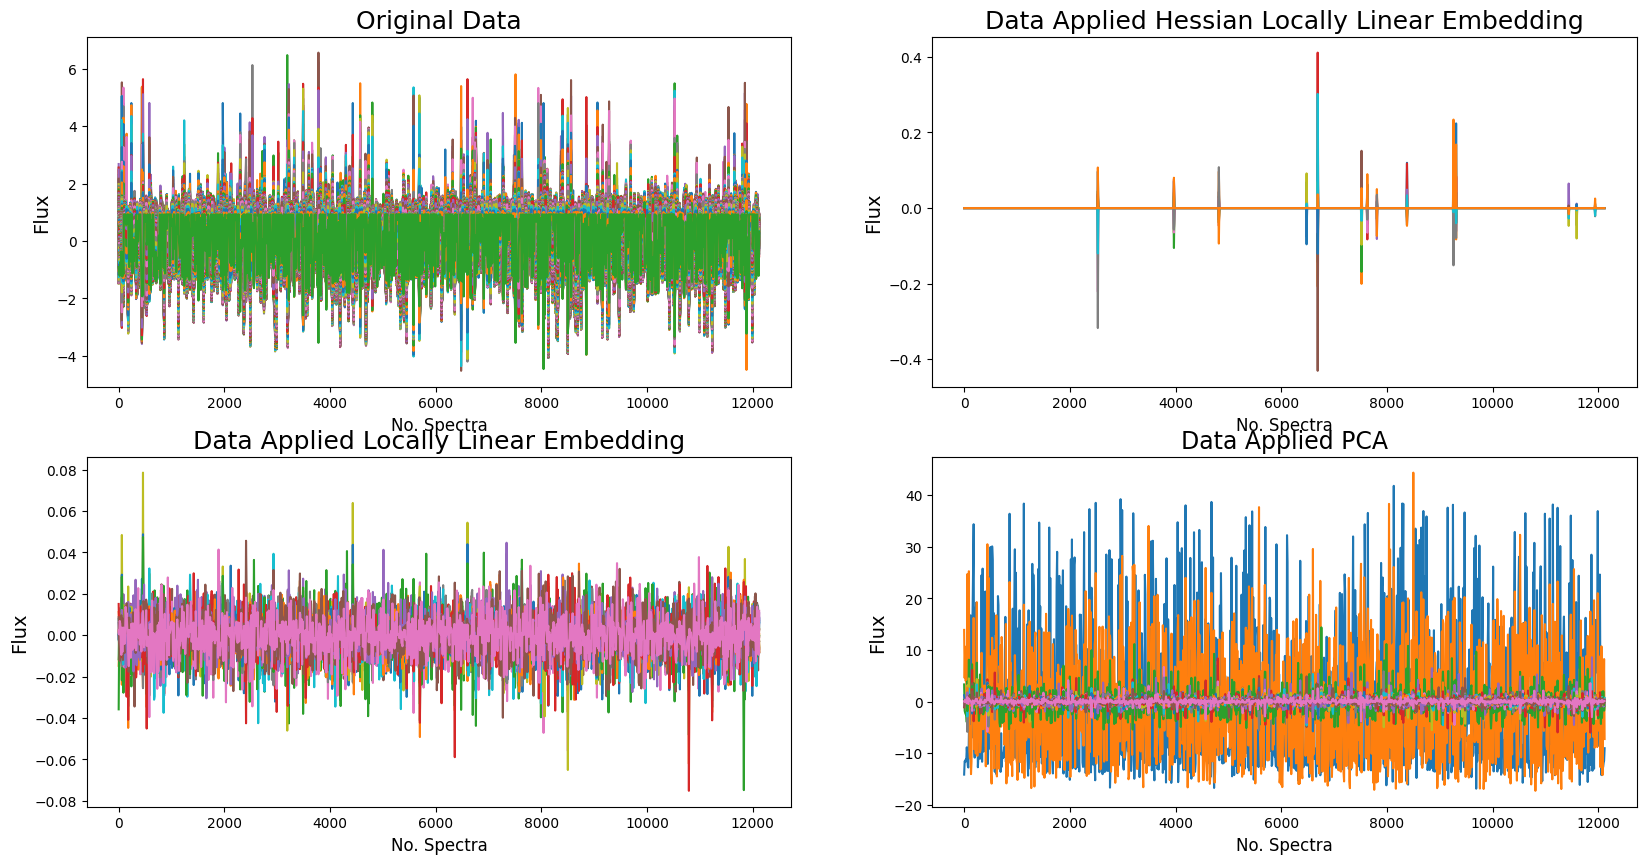

In [34]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_standardized.iloc[::10])#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data.iloc[::10,::])


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data.iloc[::10,::])

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data.iloc[::10,::])

fig.show()

In [35]:
lle_transformed_data.to_csv("DATA_LLE_RG.csv", index=False)

In [36]:
hlle_transformed_data.to_csv("DATA_HESSIAN_NP.csv", index=False)

In [37]:
pca_transformed_data.to_csv("DATA_PCA.csv", index=False)